In [0]:
# Upload dataset
from google.colab import files
uploaded = files.upload()

Saving data-iris.csv to data-iris.csv
Saving data-iris-values.csv to data-iris-values.csv


In [0]:
# %matplotlib inline
import numpy
import pandas            as pd
import matplotlib.pyplot as plt
import tensorflow        as tf
from   tensorflow.keras        import layers
from   sklearn.preprocessing   import LabelEncoder, OneHotEncoder
from   sklearn.model_selection import train_test_split

In [126]:
print("Versions:")
print("Tensorflow:", tf.VERSION)
# 1.14.0-rc1
print("Keras: ", tf.keras.__version__)
#2.2.4-tf

Versions:
Tensorflow: 1.14.0-rc1
Keras:  2.2.4-tf


In [0]:
# Fix random seed for reproducibility
numpy.random.seed(7)

In [0]:
# Load iris dataset
path = "./data-iris.csv"
dataset = pd.read_csv(path)

In [0]:
# print(features)
features = list(dataset.columns.values)

In [0]:
# Extract output values(y) from dataset, remove unnecessary columns 
y = dataset.iloc[:, -1:].values
features.remove('Species')
features.remove('Id')
X = dataset[features]

In [0]:
# One hot encoding
le = LabelEncoder()
y[:, 0] = le.fit_transform(y[:, 0])
y = pd.Series(y.reshape(150,))

In [0]:
TESTSIZE = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TESTSIZE, random_state=0)

In [0]:
# Ensure that fieldnames aren't included
X_train = X_train.values
y_train = y_train.values
X_test  = X_test.values
y_test  = y_test.values

In [0]:
NB_EPOCHS = 500  # num of epochs to test for
BATCH_SIZE = 8

In [0]:
## Create our model
model = tf.keras.Sequential()
model.add(layers.Dense(6, input_dim=4, activation='elu'))
model.add(layers.Dense(6, activation='elu'))
model.add(layers.Dense(3, activation='sigmoid' ))

In [0]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
# checkpoint: store the best model
ckpt_model = 'iris-weights.best.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(ckpt_model,
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

In [138]:
# Train the model, store the results for plotting
print('Training...')
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    nb_epoch=NB_EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=callbacks_list,
                    verbose=0)

W0620 21:20:59.202584 140209528432512 training.py:593] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Training...

Epoch 00001: val_acc improved from -inf to 0.18421, saving model to iris-weights.best.hdf5

Epoch 00002: val_acc did not improve from 0.18421

Epoch 00003: val_acc did not improve from 0.18421

Epoch 00004: val_acc did not improve from 0.18421

Epoch 00005: val_acc did not improve from 0.18421

Epoch 00006: val_acc improved from 0.18421 to 0.21053, saving model to iris-weights.best.hdf5

Epoch 00007: val_acc improved from 0.21053 to 0.23684, saving model to iris-weights.best.hdf5

Epoch 00008: val_acc did not improve from 0.23684

Epoch 00009: val_acc did not improve from 0.23684

Epoch 00010: val_acc did not improve from 0.23684

Epoch 00011: val_acc did not improve from 0.23684

Epoch 00012: val_acc did not improve from 0.23684

Epoch 00013: val_acc did not improve from 0.23684

Epoch 00014: val_acc did not improve from 0.23684

Epoch 00015: val_acc did not improve from 0.23684

Epoch 00016: val_acc did not improve from 0.23684

Epoch 00017: val_acc did not improve from 

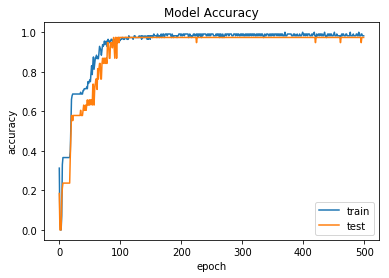

In [139]:
# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

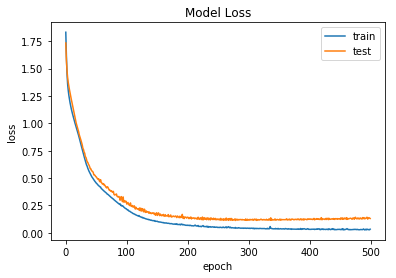

In [140]:
# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [141]:
# load model
model = tf.keras.models.load_model('iris-weights.best.hdf5')
# summarize model.
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_31 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 21        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [142]:
# evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 97.37%
